# Importação do banco de dados

In [49]:
#install.packages("readxl")
require(readxl)
bd<- read_excel("Analise heitor_02_10_21.xlsx",sheet = 1)
head(bd)
dim(bd)
#View(bd)
str(bd)

New names:
* Anticoagulante_classificação -> Anticoagulante_classificação...21
* Anticoagulante_classificação -> Anticoagulante_classificação...22
* Fluencia_verbal_classificação -> Fluencia_verbal_classificação...41
* Fluencia_verbal_classificação -> Fluencia_verbal_classificação...42



Caidor,Caidor_numero,Local,Tipo_de_queda,queda_acidental,queda_nao_acidental,Sequela_ultima_queda,Tipo_de_sequela_ultima_queda,sequela_por_queda,Genero,...,Flexibilidade_ms_classificação,Flexibilidade_MI,Flexibilidade_MI_classificação,TUG_sec,TUG_sec_classificação,DT_Sec,DT_numero_animais,quantidade_total_de_medicação,medicaçao_tipo_cardiovascular,medicaçao_tipo_cardiovascular_classificação
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Sim,1,loc,nao acidental,nao,sim,sim,edema,sim,mulher,...,1,-33,1,8.90,1,9.1,10,8,Beta + Anti_Coag,4
não,0,loc,nao,nao,nao,nao,nao,sim,mulher,...,0,0,0,7.11,1,9.0,8,8,Beta + Anti_HAS,3
não,0,loc,nao,nao,nao,nao,nao,sim,mulher,...,0,-15,1,7.42,1,8.6,7,6,Beta + Anti_Coag,4
Sim,1,loc,acidental,sim,nao,nao,nao,sim,mulher,...,1,-4,0,10.52,0,11.9,7,8,Beta + Anti_Coag + Diu,5
não,0,loc,nao,nao,nao,nao,nao,sim,mulher,...,NA,-19,1,9.31,1,13.2,9,7,Beta + Anti_Coag + Diu,5
não,0,loc,nao,nao,nao,nao,nao,nao,mulher,...,NA,0,0,7.17,0,8.7,6,4,Beta + Anti_HAS,3


[1] 72 71

tibble [72 x 71] (S3: tbl_df/tbl/data.frame)
 $ Caidor                                     : chr [1:72] "Sim" "não" "não" "Sim" ...
 $ Caidor_numero                              : num [1:72] 1 0 0 1 0 0 1 0 0 1 ...
 $ Local                                      : chr [1:72] "loc" "loc" "loc" "loc" ...
 $ Tipo_de_queda                              : chr [1:72] "nao acidental" "nao" "nao" "acidental" ...
 $ queda_acidental                            : chr [1:72] "nao" "nao" "nao" "sim" ...
 $ queda_nao_acidental                        : chr [1:72] "sim" "nao" "nao" "nao" ...
 $ Sequela_ultima_queda                       : chr [1:72] "sim" "nao" "nao" "nao" ...
 $ Tipo_de_sequela_ultima_queda               : chr [1:72] "edema" "nao" "nao" "nao" ...
 $ sequela_por_queda                          : chr [1:72] "sim" "sim" "sim" "sim" ...
 $ Genero                                     : chr [1:72] "mulher" "mulher" "mulher" "mulher" ...
 $ Genero_classificação                       : num [1:72] 

# Preparação do banco de dados

In [50]:
#Remover as variáveis referentes à queda (multicolinearidade) e as duplicadas (classificação das variáveis que possuem valor absoluto)
bd<- bd[,c(-2,-3,-4,-5,-6,-7,-8,-9,-11,-22,-24,-27,-28,-32,-36,-37,-41,-42,-44,-46,-48,-51,-54,-56,-58,-60,-62,-64,-66,-71)] 
dim(bd)
str(bd)
#bd = as.data.frame(unclass(bd), stringsAsFactors = TRUE) Transforma tudo que for string em fator
#bd[, categorical_columns] <- lapply(bd[, categorical_columns], as.factor) Transforma as colunas especificadas em fator
bd[] <- lapply(bd, as.factor) #Transforma todo o banco de dados em fator
bd[,c("idade","Tempo_doença","MMSE","Fluencia_verbal","Trilhas_A","Trilhas_b","GDS","FES_I","Vsaq","Vo2_maximo_avaliado","IMC","Berg","STS","Flexibilidade_Ms","Flexibilidade_MI",'TUG_sec',"DT_Sec","DT_numero_animais","quantidade_total_de_medicação","Dinamometria")] <- lapply(bd[,c("idade","Tempo_doença","MMSE","Fluencia_verbal","Trilhas_A","Trilhas_b","GDS","FES_I","Vsaq","Vo2_maximo_avaliado","IMC","Berg","STS","Flexibilidade_Ms","Flexibilidade_MI",'TUG_sec',"DT_Sec","DT_numero_animais","quantidade_total_de_medicação","Dinamometria")], as.numeric) 
str(bd)

[1] 72 41

tibble [72 x 41] (S3: tbl_df/tbl/data.frame)
 $ Caidor                           : chr [1:72] "Sim" "não" "não" "Sim" ...
 $ Genero                           : chr [1:72] "mulher" "mulher" "mulher" "mulher" ...
 $ idade                            : num [1:72] 76 73 75 83 83 78 83 82 78 75 ...
 $ Nivel_social                     : chr [1:72] "b" "b" "c" "b" ...
 $ etnia                            : chr [1:72] "branco" "branco" "branco" "branco" ...
 $ Nivel_educacional                : num [1:72] 16 16 12 10 10 12 20 8 14 16 ...
 $ Frequencia_atividade             : chr [1:72] "3x" "3x" "2x" "sedentario" ...
 $ Criterio_AHA                     : chr [1:72] "c" "b" "b" "c" ...
 $ AHA_classificaçao                : num [1:72] 1 0 0 1 1 0 1 0 0 1 ...
 $ Anti_hipertensivo                : chr [1:72] "nao" "sim" "sim" "sim" ...
 $ betabloqueador                   : chr [1:72] "sim" "sim" "sim" "sim" ...
 $ Anticoagulante_classificação...21: chr [1:72] "nao" "nao" "nao" "sim" ...
 $ Diuretico

In [51]:
table(bd$Caidor) #(48 não e 24 sim)
bd2<- na.omit(bd) 
dim(bd2) #52 idosos após remoção dos Nas
table(bd2$Caidor) #(33 não e 19 sim)


não Sim 
 48  24 

[1] 52 41


não Sim 
 33  19 

# Divisão do banco de dados (treino e teste)

In [52]:
#install.packages("caret")
require(caret)
set.seed(111)
train<- createDataPartition(bd2$Caidor,p=0.7,list=F)
data_train<- bd2[train,]
data_test<- bd2[-train,]
table(data_train$Caidor) #(24 não e 14 sim) 
table(data_test$Caidor) #(9 não e 5 sim)
str(data_train$Caidor)
str(data_test$Caidor)


não Sim 
 24  14 


não Sim 
  9   5 

 Factor w/ 2 levels "não","Sim": 2 1 2 1 2 1 1 2 1 2 ...
 Factor w/ 2 levels "não","Sim": 2 1 1 1 1 1 2 2 2 1 ...


# RFE-RF


Recursive feature selection

Outer resampling method: Cross-Validated (5 fold) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD KappaSD Selected
         2   0.6357 0.2118    0.15288  0.3821         
         3   0.6893 0.2796    0.20384  0.4900         
         4   0.7143 0.3567    0.15821  0.4014         
         5   0.7679 0.4607    0.20124  0.4951        *
         6   0.7429 0.4035    0.17063  0.4294         
         7   0.7429 0.4035    0.17063  0.4294         
         8   0.7429 0.4035    0.17063  0.4294         
         9   0.7179 0.3376    0.15485  0.3936         
        10   0.7429 0.4035    0.17063  0.4294         
        11   0.7429 0.4035    0.17063  0.4294         
        12   0.7179 0.3376    0.15485  0.3936         
        13   0.7179 0.3376    0.15485  0.3936         
        14   0.7179 0.3376    0.15485  0.3936         
        15   0.7179 0.3376    0.15485  0.3936         
        16   0.7179 0.3376    0.15485  0.3936      

[1] "DT_Sec"              "Berg"                "Vo2_maximo_avaliado"
[4] "STS"                 "FES_I"

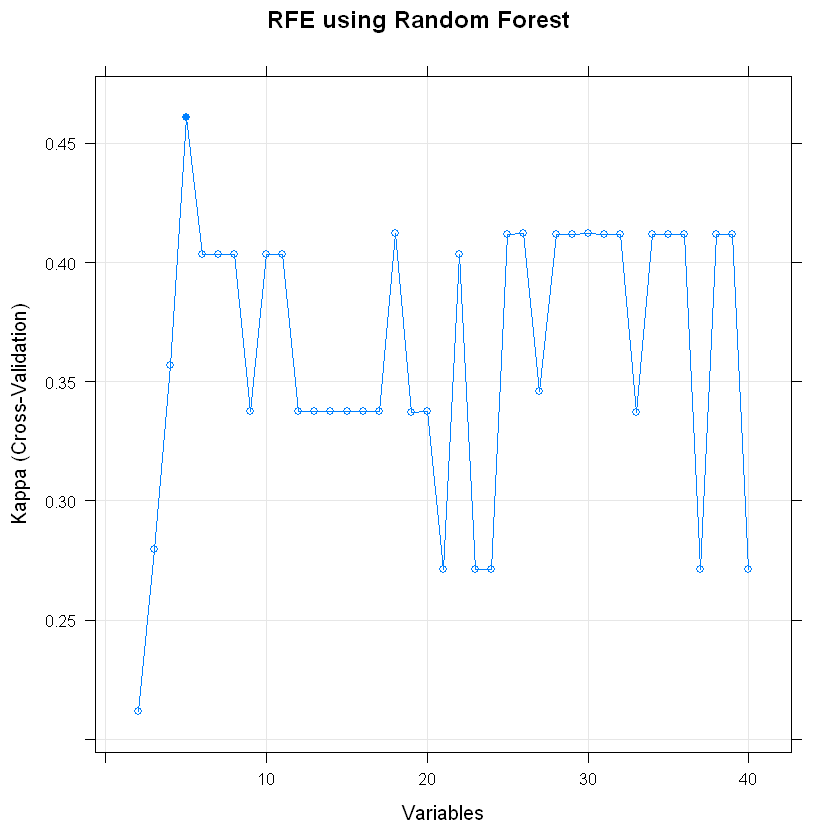

In [55]:
#define the control using a random forest selection function
#install.packages("e1071")
require(e1071)
#install.packages("randomForest")
require(randomForest)
set.seed(1)
control <- rfeControl(functions=rfFuncs, method="cv", number=5)
set.seed(2)
results <- rfe(data_train[,2:41], data_train[[1]], sizes=c(2:41), 
         rfeControl=control,metric=ifelse(is.factor(data_train$Caidor),"Kappa","RMSE")) #Não permite NA nos preditores
print(results) #5 variáveis + caidor 
#list the chosen features
predictors(results) #(DT_Sec, Berg, Vo2_maximo_avaliado, STS e FES_I)
#plot the results
plot(results, type=c("g", "o"),main="RFE using Random Forest")

# Random Forest a partir do subset definido pelo RFE-RF

Caidor,DT_Sec,Berg,Vo2_maximo_avaliado,STS,FES_I
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sim,26,11,20,2,10
não,22,11,3,4,4
Sim,27,11,25,3,6
não,8,12,26,9,4
Sim,23,8,4,5,8
não,16,7,2,7,13


Random Forest 

38 samples
 5 predictor
 2 classes: 'não', 'Sim' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 30, 30, 31, 30, 31 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.8142857  0.5933333
  3     0.8142857  0.5933333
  5     0.8142857  0.5933333

Kappa was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


Call:
 randomForest(x = x, y = y, mtry = min(param$mtry, ncol(x))) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 18.42%
Confusion matrix:
    não Sim class.error
não  21   3   0.1250000
Sim   4  10   0.2857143

Confusion Matrix and Statistics

     RF_prediction
      não Sim
  não   7   2
  Sim   4   1
                                          
               Accuracy : 0.5714          
                 95% CI : (0.2886, 0.8234)
    No Information Rate : 0.7857          
    P-Value [Acc > NIR] : 0.9830          
                                          
                  Kappa : -0.0244         
                                          
 Mcnemar's Test P-Value : 0.6831          
                                          
            Sensitivity : 0.6364          
            Specificity : 0.3333          
         Pos Pred Value : 0.7778          
         Neg Pred Value : 0.2000          
             Prevalence : 0.7857          
         Detection Rate : 0.5000          
   Detection Prevalence : 0.6429          
      Balanced Accuracy : 0.4848          
                                          
       'Positive' Class : não             
                                          

Sensitivity          Specificity       Pos Pred Value 
           0.6363636            0.3333333            0.7777778 
      Neg Pred Value            Precision               Recall 
           0.2000000            0.7777778            0.6363636 
                  F1           Prevalence       Detection Rate 
           0.7000000            0.7857143            0.5000000 
Detection Prevalence    Balanced Accuracy 
           0.6428571            0.4848485

rf variable importance

                    Overall
DT_Sec              100.000
Vo2_maximo_avaliado  96.771
Berg                 32.122
FES_I                 9.676
STS                   0.000

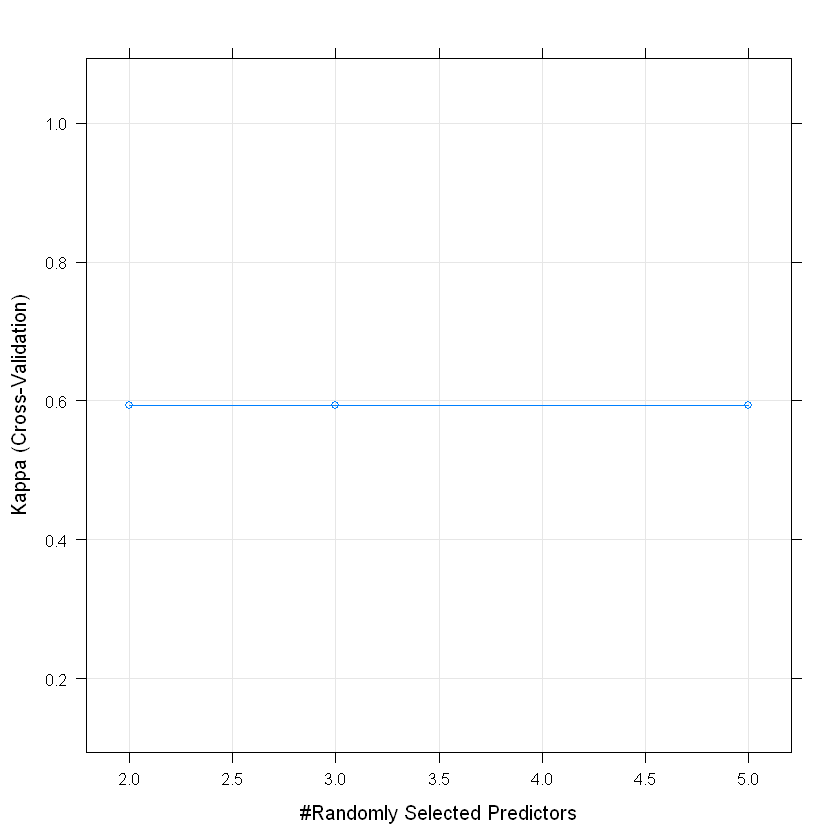

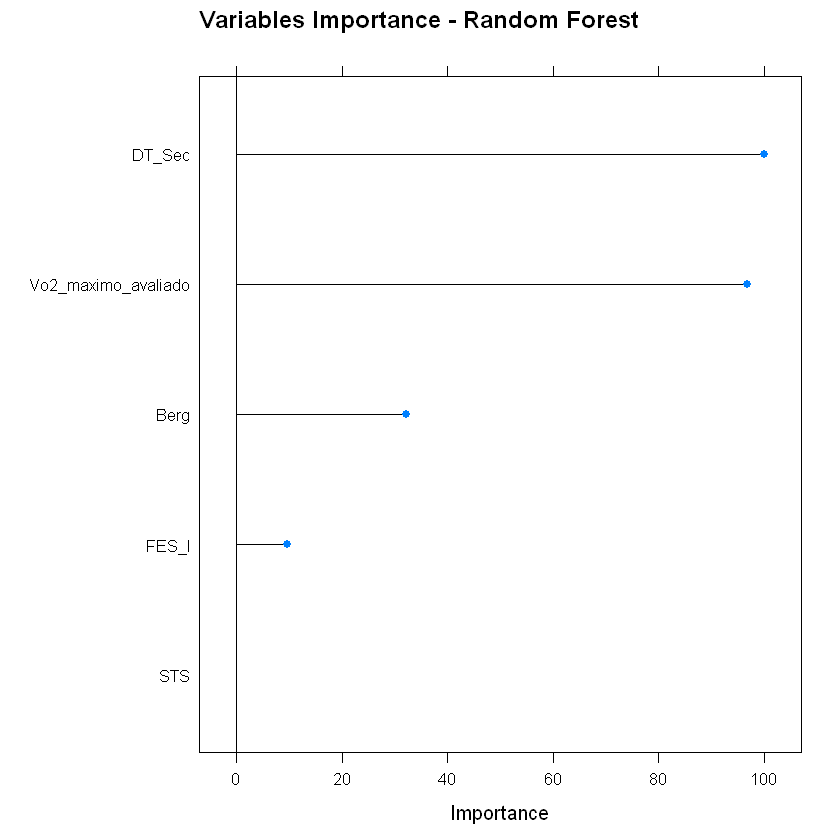

In [57]:
data_train_rfe<- data_train[,c("Caidor","DT_Sec",
                               "Berg","Vo2_maximo_avaliado","STS","FES_I")]
data_test_rfe<- data_test[,c("Caidor","DT_Sec",
                             "Berg","Vo2_maximo_avaliado","STS","FES_I")]
head(data_train_rfe)
set.seed(4)
RF_model1=train(Caidor~.,data=data_train_rfe,method='rf',metric=ifelse(is.factor(data_train_rfe$Caidor),"Kappa","RMSE"),trControl=trainControl(method='cv',number=5,savePredictions=TRUE))
RF_model1 #Acurácia= 81.42% e kappa= 59.33%
plot(RF_model1)
#RF_model1$pred
#mtry2<- subset(RF_model1$pred,RF_model1$pred[4]==2)
#mtry2
RF_model1$finalModel #Acurácia= 81.58%
RF_prediction<- predict(RF_model1,data_test_rfe)
confusionMatrix(table(data_test_rfe$Caidor,RF_prediction)) #Acurácia e Kappa (92,86 e 83,72%) 
confusionMatrix(table(data_test_rfe$Caidor,RF_prediction))$byClass #Recall e F1 CCL(0.9 e 0.9473) 
varImp(RF_model1)
plot(varImp(RF_model1),main="Variables Importance - Random Forest")

# RFE-DT

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows


Recursive feature selection

Outer resampling method: Cross-Validated (5 fold) 

Resampling performance over subset size:

 Variables Accuracy   Kappa AccuracySD KappaSD Selected
         2   0.5821 0.08374    0.12665  0.1543         
         3   0.6071 0.14850    0.14779  0.2331         
         4   0.6607 0.24843    0.10102  0.2099         
         5   0.6536 0.19212    0.13576  0.3223         
         6   0.7036 0.31857    0.16541  0.3650         
         7   0.7036 0.31857    0.16541  0.3650         
         8   0.7321 0.39050    0.10862  0.2297         
         9   0.7036 0.31857    0.16541  0.3650         
        10   0.7321 0.39050    0.10862  0.2297         
        11   0.7071 0.32574    0.11750  0.2478         
        12   0.7357 0.39168    0.09053  0.2092         
        13   0.7857 0.50597    0.08280  0.1949        *
        14   0.7857 0.50597    0.08280  0.1949         
        15   0.7321 0.39050    0.10862  0.2297         
        16   0.7321 0.39050    0.108

[1] "Vo2_maximo_avaliado"               "Berg"                             
 [3] "Anticoagulante_classificação...21" "STS"                              
 [5] "DT_Sec"                            "FES_I"                            
 [7] "Trilhas_b"                         "medicaçao_tipo_cardiovascular"    
 [9] "quantidade_total_de_medicação"     "Fluencia_verbal"                  
[11] "Tempo_doença"                      "TUG_sec"                          
[13] "Criterio_AHA"

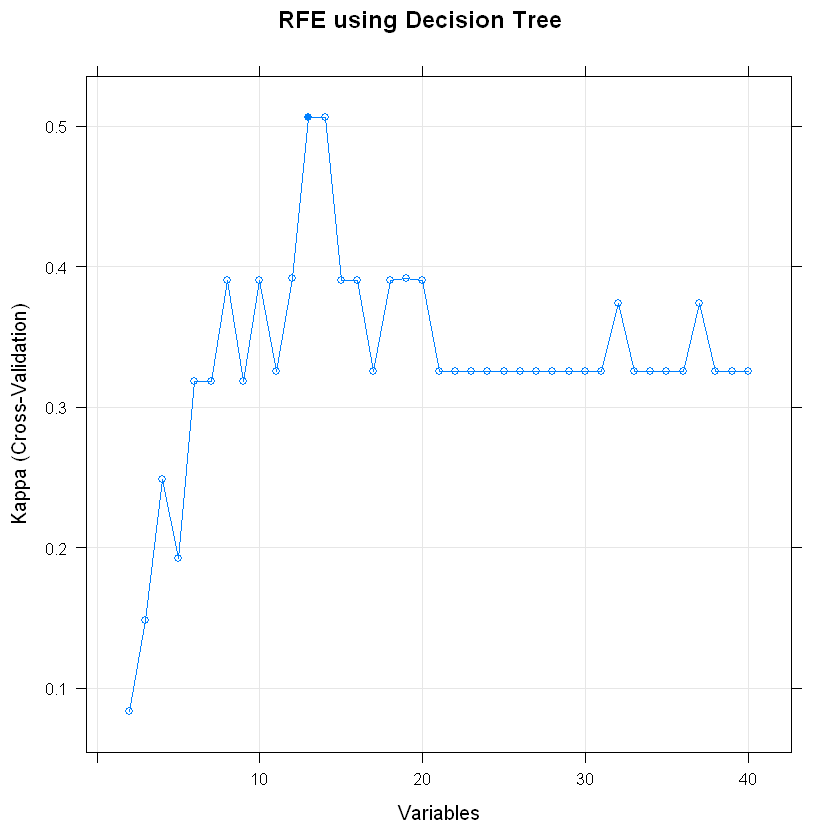

In [58]:
#The control was defined using a treebag selection function
set.seed(11)
control2 <- rfeControl(functions=treebagFuncs, method="cv", number=5)
set.seed(22)
results2 <- rfe(data_train[,2:41], data_train[[1]], sizes=c(2:41),
                rfeControl=control,metric=ifelse(is.factor(data_train$Caidor),"Kappa","RMSE"))
print(results2) #13 variáveis + caidor
#list the chosen features
predictors(results2) #(Vo2_maximo_avaliado,Berg,Anticoagulante_classifica��o...21,STS,DT_Sec,FES_I,Trilhas_b,medica�ao_tipo_cardiovascular,quantidade_total_de_medica��o,Fluencia_verbal,Tempo_doen�a,TUG_sec,Criterio_AHA)
#plot the results
plot(results2, type=c("g", "o"),main="RFE using Decision Tree")

# Decision Tree a partir do subset definido pelo RFE-DT

Caidor,Vo2_maximo_avaliado,Berg,Anticoagulante_classificação...21,STS,DT_Sec,FES_I,Trilhas_b,medicaçao_tipo_cardiovascular,quantidade_total_de_medicação,Fluencia_verbal,Tempo_doença,TUG_sec,Criterio_AHA
<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Sim,20,11,nao,2,26,10,11,Beta + Anti_Coag,7,17,5,42,c
não,3,11,nao,4,22,4,43,Beta + Anti_Coag,5,5,5,33,b
Sim,25,11,sim,3,27,6,30,Beta,1,9,4,38,c
não,26,12,nao,9,8,4,27,Beta,5,10,2,9,b
Sim,4,8,sim,5,23,8,40,Beta + Anti_Coag + Diu,7,4,20,36,c
não,2,7,nao,7,16,13,46,Beta + Anti_Coag + Diu,5,6,5,30,c


CART 

38 samples
13 predictors
 2 classes: 'não', 'Sim' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 32, 30, 30, 30, 30 
Resampling results across tuning parameters:

  cp    Accuracy  Kappa    
  0.00  0.725     0.4717698
  0.25  0.700     0.4058357
  0.50  0.700     0.4058357

Kappa was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.

Confusion Matrix and Statistics

          Reference
Prediction não Sim
       não   7   2
       Sim   4   1
                                          
               Accuracy : 0.5714          
                 95% CI : (0.2886, 0.8234)
    No Information Rate : 0.7857          
    P-Value [Acc > NIR] : 0.9830          
                                          
                  Kappa : -0.0244         
                                          
 Mcnemar's Test P-Value : 0.6831          
                                          
            Sensitivity : 0.6364          
            Specificity : 0.3333          
         Pos Pred Value : 0.7778          
         Neg Pred Value : 0.2000          
             Prevalence : 0.7857          
         Detection Rate : 0.5000          
   Detection Prevalence : 0.6429          
      Balanced Accuracy : 0.4848          
                                          
       'Positive' Class : não             
                              

Sensitivity          Specificity       Pos Pred Value 
           0.6363636            0.3333333            0.7777778 
      Neg Pred Value            Precision               Recall 
           0.2000000            0.7777778            0.6363636 
                  F1           Prevalence       Detection Rate 
           0.7000000            0.7857143            0.5000000 
Detection Prevalence    Balanced Accuracy 
           0.6428571            0.4848485

Loading required package: rpart.plot

Loading required package: rpart



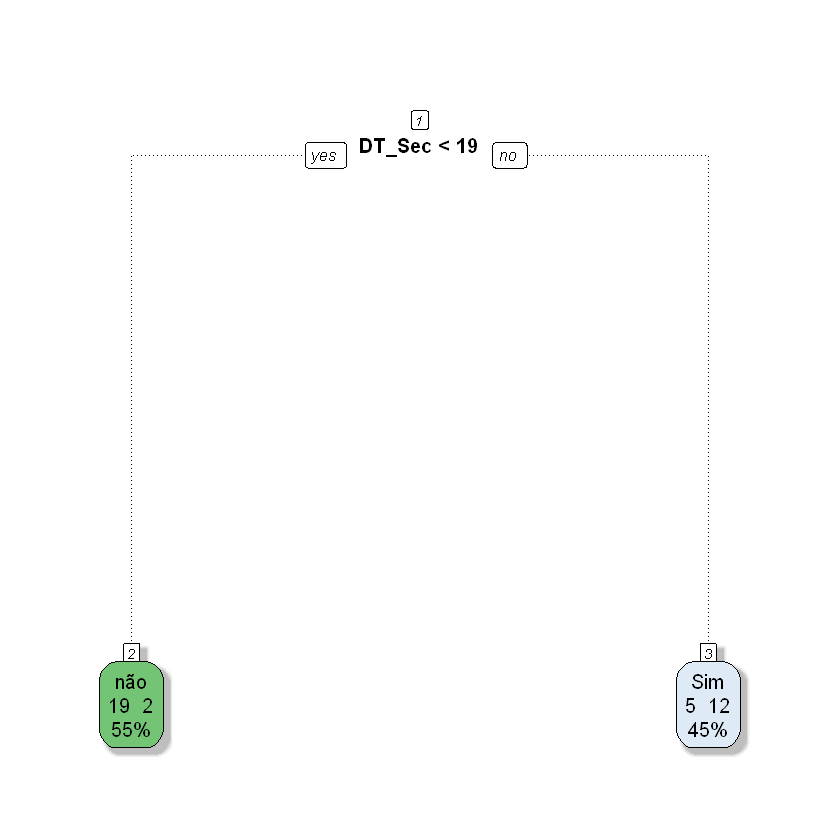

In [59]:
data_train_rfe2<- data_train[,c("Caidor","Vo2_maximo_avaliado","Berg","Anticoagulante_classificação...21",
                                "STS","DT_Sec","FES_I","Trilhas_b","medicaçao_tipo_cardiovascular",
                                "quantidade_total_de_medicação","Fluencia_verbal","Tempo_doença","TUG_sec","Criterio_AHA")]
data_test_rfe2<- data_test[,c("Caidor","Vo2_maximo_avaliado","Berg","Anticoagulante_classificação...21",
                              "STS","DT_Sec","FES_I","Trilhas_b","medicaçao_tipo_cardiovascular",
                              "quantidade_total_de_medicação","Fluencia_verbal","Tempo_doença","TUG_sec","Criterio_AHA")]
head(data_train_rfe2)
set.seed(44)
Tree_model1=train(Caidor~.,data=data_train_rfe2,method='rpart',metric=ifelse(is.factor(data_train_rfe$Caidor),"Kappa","RMSE"),trControl=trainControl(method='cv',number=5,savePredictions=TRUE))
Tree_model1 #Acurácia= 72.5% e kappa = 47.17% e cp=0
#Tree_model1$pred
predicition_Treemodel1<- predict(Tree_model1,data_test_rfe2)
confusionMatrix(data_test_rfe2$Caidor,predicition_Treemodel1) #Acurácia e kappa = 100%
confusionMatrix(data_test_rfe2$Caidor,predicition_Treemodel1)$byClass #recall e F1 (1 e 1)
#install.packages("rpart.plot")
require(rpart.plot)
rpart.plot(Tree_model1$finalModel,type=0,extra=101,box.palette = "GnBu",
           branch.lty=3,shadow.col = "gray",nn=T,cex=1)

# Regressão Logística com o dataset completo (com NA - bd) e subset resultante do RFE-RF (variáveis)

In [61]:
set.seed(123)
RL_model<- glm(bd$Caidor~.,data=bd[,c("DT_Sec","Berg","Vo2_maximo_avaliado","STS","FES_I")], family = 'binomial')
summary(RL_model)

#Prediction (se o dataset fosse disivido em treino e teste)
#probs_pred<- predict(RL_model,data_test_rfe,type = "response")
#Accuracy
#head(probs_pred)
#pred= ifelse(probs_pred>.5,1,0)
#table(pred,data_test_rfe$Caidor)
#mean(pred==data_test_rfe$Caidor)
#Razão de chances
odd.ratio<- exp(coef(RL_model))
odd.ratio

#Curva roc
#install.packages("pROC")
#require(pROC)
#plot.roc(roc(data_test_rfe$Caidor,probs_pred,plot = T),print.auc=T)


Call:
glm(formula = bd$Caidor ~ ., family = "binomial", data = bd[, 
    c("DT_Sec", "Berg", "Vo2_maximo_avaliado", "STS", "FES_I")])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9696  -0.5223  -0.4374   0.4982   2.2343  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)   
(Intercept)          4.89844    3.28033   1.493  0.13536   
DT_Sec               0.10618    0.05194   2.044  0.04093 * 
Berg                -0.62528    0.24172  -2.587  0.00969 **
Vo2_maximo_avaliado -0.03847    0.03732  -1.031  0.30266   
STS                  0.08716    0.18597   0.469  0.63928   
FES_I               -0.07455    0.10892  -0.684  0.49373   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 73.871  on 56  degrees of freedom
Residual deviance: 47.666  on 51  degrees of freedom
  (15 observations deleted due to missingness)
AIC: 59.666

Number of Fisher Scoring

(Intercept)              DT_Sec                Berg Vo2_maximo_avaliado 
        134.0802030           1.1120209           0.5351121           0.9622585 
                STS               FES_I 
          1.0910746           0.9281653

# RL somente com a variável DT_Sec (dataset completo - com NA)

In [65]:
set.seed(321)
RL_model2<- glm(Caidor~DT_Sec,data=bd, family = 'binomial')
summary(RL_model2)
#Razão de chances
odd.ratio<- exp(coef(RL_model2)) 
odd.ratio


Call:
glm(formula = Caidor ~ DT_Sec, family = "binomial", data = bd)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7004  -0.8846  -0.5051   1.0958   1.8187  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.44844    0.69575  -3.519 0.000433 ***
DT_Sec       0.10070    0.03231   3.117 0.001826 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 86.524  on 65  degrees of freedom
Residual deviance: 74.489  on 64  degrees of freedom
  (6 observations deleted due to missingness)
AIC: 78.489

Number of Fisher Scoring iterations: 3


(Intercept)      DT_Sec 
 0.08642864  1.10594978

## Análise descritiva da variável DT_Sec por classe da variável caidor (não/sim)

In [4]:
table(bd$Caidor)
str(bd$Caidor)

cair_nao<- bd[bd$Caidor=="não",]
cair_sim<- bd[bd$Caidor=="Sim",]
dim(cair_nao)
dim(cair_sim)

summary(cair_nao$DT_Sec)
summary(cair_sim$DT_Sec)
table(bd$Caidor)


não Sim 
 48  24 

 chr [1:72] "Sim" "não" "não" "Sim" "não" "não" "Sim" "não" "não" "Sim" ...


[1] 48 71

[1] 24 71

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  4.900   6.300   7.450   7.740   8.075  19.000       6 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  6.900   7.575   8.700   9.483   9.425  20.000 


não Sim 
 48  24 

# Decision Tree com o dataset completo (sem NA - bd2)

CART 

52 samples
40 predictors
 2 classes: 'não', 'Sim' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 41, 42, 42, 42, 41 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa     
  0.00000000  0.6309091   0.1648529
  0.05263158  0.6309091   0.1648529
  0.42105263  0.5745455  -0.0400000

Kappa was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.05263158.

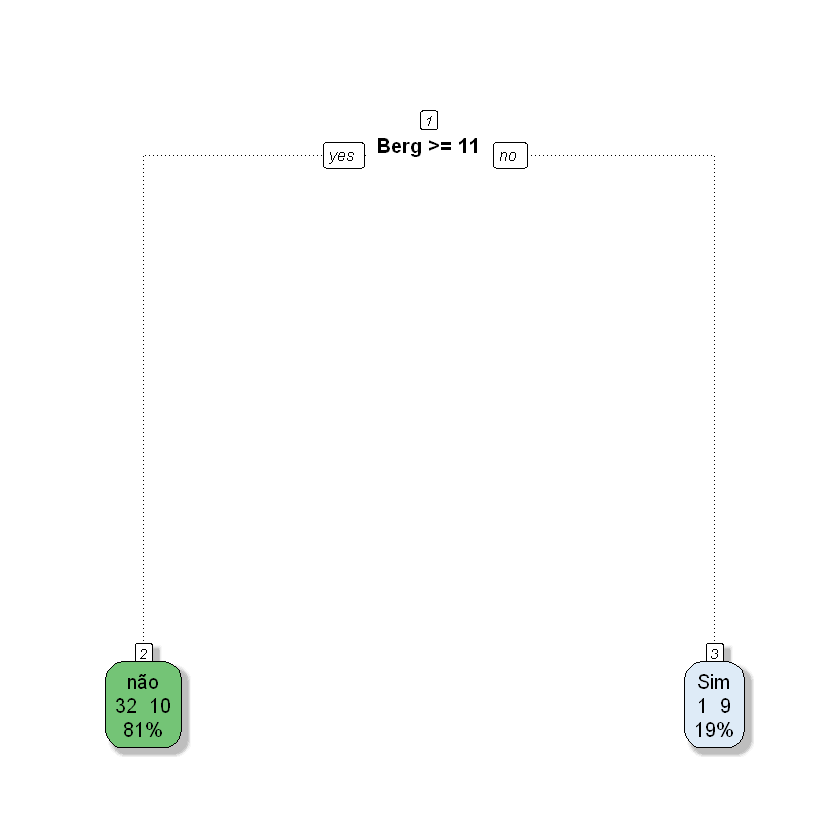

In [68]:
set.seed(55)
require(caret)
Tree_model2=train(Caidor~.,data=bd2,method='rpart',metric=ifelse(is.factor(bd2$Caidor),"Kappa","RMSE"),
                  trControl=trainControl(method='cv',number=5,savePredictions=TRUE))
Tree_model2 
#Tree_model1$pred
#predicition_Treemodel2<- predict(Tree_model2,y)
#confusionMatrix(y$Caidor,predicition_Treemodel2) 
#confusionMatrix(y$Caidor,predicition_Treemodel2)$byClass
#install.packages("rpart.plot")
#require(rpart.plot)
rpart.plot(Tree_model2$finalModel,type=0,extra=101,box.palette = "GnBu",
           branch.lty=3,shadow.col = "gray",nn=T,cex=1)